# ADTA 5900: CNN on CIFAR-10: Final Project

## Set Path for Data Folder

In [1]:
 # Put file path as a string here

CIFAR_DIR = 'CIFAR_10_DATA/'

## Load Data

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [3]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

all_data = [0,1,2,3,4,5,6]

for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

In [4]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [5]:
batch_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [6]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

## Display several examples of single images using matplotlib 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [8]:
X = data_batch1[b"data"] 

In [9]:
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [10]:
X[0].max()

255

In [11]:
(X[0]/255).max()

1.0

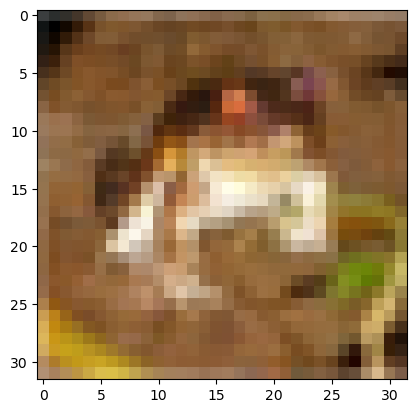

In [12]:
plt.imshow(X[0])

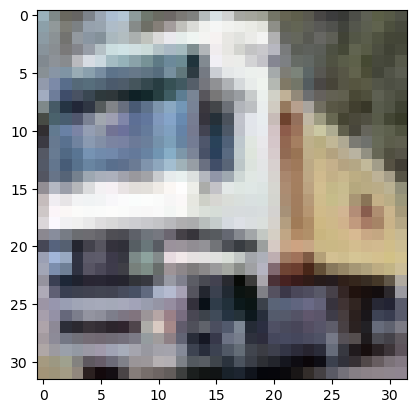

In [13]:
plt.imshow(X[1])

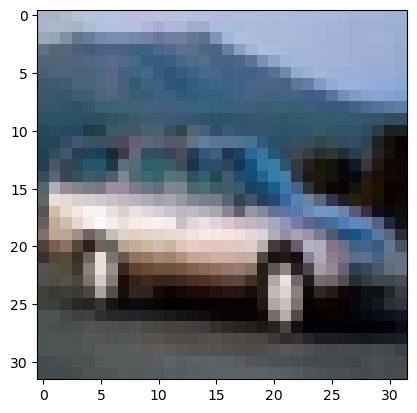

In [14]:
plt.imshow(X[4])

## Supporting Functions to Rearrange Data

### Encode Labels into One-Hot Format

In [15]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

## Set Up Image Data: Make it Ready to be Fed into 1st Conv Layer

In [16]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        self.test_batch = [test_batch]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        print("Setting Up Training Images and Labels")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)

        
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i+batch_size]
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

## Set up image data: Calling CifarHelper.set_up_images()

In [17]:
# Before Your tf.Session run these two lines
ch = CifarHelper()
ch.set_up_images()

# During your session to grab the next batch use this line
# (Just like we did for mnist.train.next_batch)
# batch = ch.next_batch(100)

Setting Up Training Images and Labels


Setting Up Test Images and Labels


## Define Supporting Functions to Build, Train, and Test CNN Model

In [18]:
import tensorflow as tf
import numpy as np
import pickle

In [19]:
def init_weights(shape): 
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)
def init_bias(shape): 
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

# PHASE II: Build Convolutional Neural Network

## Create Placeholders for Inputs and Labels: x and y_true

In [20]:
# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y_true = tf.placeholder(tf.float32, [None, 10])
hold_prob = tf.placeholder(tf.float32)
training = tf.placeholder(tf.bool)

## Reshape the Input Placeholder x: NOT NEED TO RESHAPE DATA HERE

In [21]:
# DO NOTHING -- DON'T NEED TO RESHAPE - DATA IS ALREADY IN GOOD SHAPE TO BE FED INTO 1ST CONVOLUTION LAYER

### CNN Performance Improvement

In [22]:
import tensorflow as tf

# Define placeholders
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y_true = tf.placeholder(tf.float32, shape=[None, 10])
hold_prob = tf.placeholder(tf.float32)


In [23]:

# Build the improved model
convo_1 = convolutional_layer(x, shape=[3, 3, 3, 64])
convo_2 = convolutional_layer(convo_1, shape=[3, 3, 64, 64])
convo_2_pooling = max_pool_2by2(convo_2)

convo_3 = convolutional_layer(convo_2_pooling, shape=[3, 3, 64, 128])
convo_4 = convolutional_layer(convo_3, shape=[3, 3, 128, 128])
convo_4_pooling = max_pool_2by2(convo_4)

convo_5 = convolutional_layer(convo_4_pooling, shape=[3, 3, 128, 256])
convo_6 = convolutional_layer(convo_5, shape=[3, 3, 256, 256])

convo_6_flat = tf.reshape(convo_6, [-1, 8*8*256])
full_layer_one = tf.nn.relu(normal_full_layer(convo_6_flat, 1024))

full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

y_pred = normal_full_layer(full_one_dropout, 10)

# Define loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

# Learning rate schedule
global_step = tf.Variable(0, trainable=False)
initial_learning_rate = 0.001
learning_rate = tf.train.exponential_decay(initial_learning_rate,
                                           global_step,
                                           decay_steps=1000,
                                           decay_rate=0.96,
                                           staircase=True)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(cross_entropy, global_step=global_step)

init = tf.global_variables_initializer()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.






In [30]:

# Train the model
steps = 5000
batch_size = 64


In [31]:
# Lists to store accuracy, loss, and step number
accuracies = []
losses = []
step_numbers = []

In [32]:

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(steps):
        batch_x, batch_y = ch.next_batch(batch_size)
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y, hold_prob: 0.5})
        
        # Print out a message every 100 steps
        if i % 100 == 0:
            print('Currently on step {}'.format(i))

            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            test_accuracy = sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0})
            test_loss = sess.run(cross_entropy, feed_dict={x: ch.test_images, y_true: ch.test_labels, hold_prob: 1.0})
            
            print('Accuracy: {:.4f}'.format(test_accuracy))
            print('Loss: {:.4f}'.format(test_loss))
            print('\n')
            
            # Store accuracy, loss, and step number
            accuracies.append(test_accuracy)
            losses.append(test_loss)
            step_numbers.append(i)
            

Currently on step 0
Accuracy: 0.1102
Loss: 706.9407


Currently on step 100
Accuracy: 0.3376
Loss: 1.8467


Currently on step 200
Accuracy: 0.3883
Loss: 1.6978


Currently on step 300
Accuracy: 0.3673
Loss: 1.6964


Currently on step 400
Accuracy: 0.4090
Loss: 1.6054


Currently on step 500
Accuracy: 0.4617
Loss: 1.4950


Currently on step 600
Accuracy: 0.4598
Loss: 1.4762


Currently on step 700
Accuracy: 0.4495
Loss: 1.5064


Currently on step 800
Accuracy: 0.4687
Loss: 1.4709


Currently on step 900
Accuracy: 0.4525
Loss: 1.5318


Currently on step 1000
Accuracy: 0.5027
Loss: 1.3666


Currently on step 1100
Accuracy: 0.4860
Loss: 1.4060


Currently on step 1200
Accuracy: 0.5002
Loss: 1.3641


Currently on step 1300
Accuracy: 0.5177
Loss: 1.3262


Currently on step 1400
Accuracy: 0.5272
Loss: 1.2832


Currently on step 1500
Accuracy: 0.5337
Loss: 1.2840


Currently on step 1600
Accuracy: 0.5491
Loss: 1.2550


Currently on step 1700
Accuracy: 0.5631
Loss: 1.2283


Currently on step 18

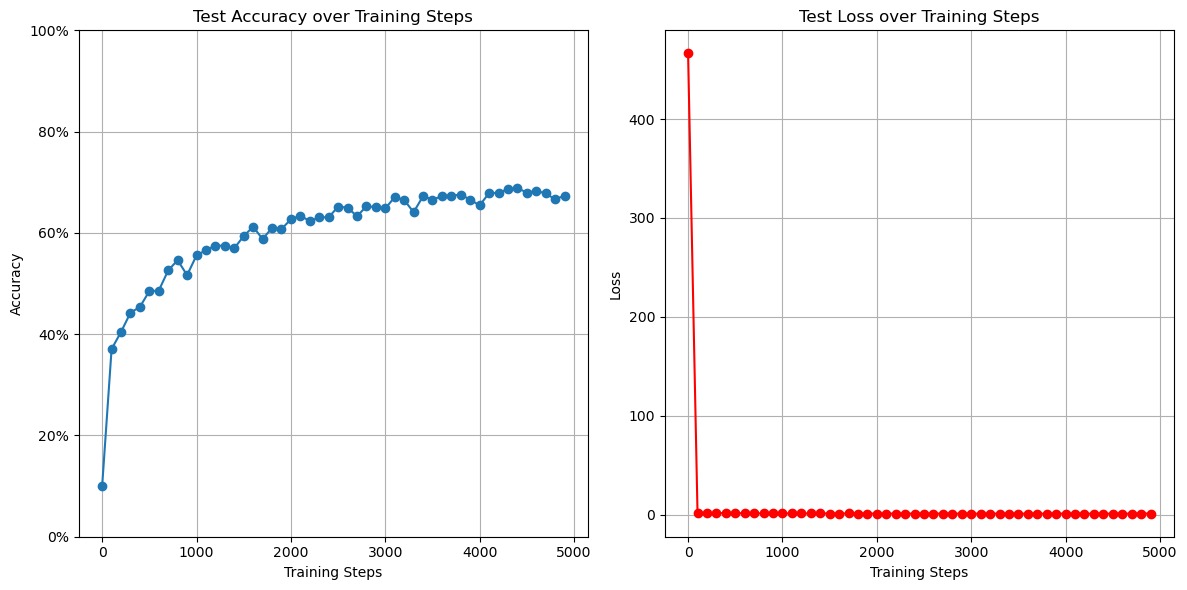

In [28]:
# After training, plot the accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(step_numbers, accuracies, marker='o')
plt.title('Test Accuracy over Training Steps')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(step_numbers, losses, marker='o', color='r')
plt.title('Test Loss over Training Steps')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

diagram of the network architecture 

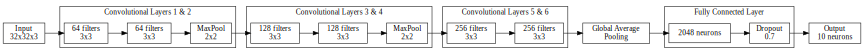

In [29]:
from graphviz import Digraph
from IPython.display import display

def create_nn_diagram():
    dot = Digraph(comment='Improved CNN Architecture')
    dot.attr(rankdir='LR', size='12,8')  # LR for horizontal layout

    # Input Layer
    dot.node('input', 'Input\n32x32x3', shape='box')

    # Convolutional Layers 1 & 2
    with dot.subgraph(name='cluster_conv1_2') as c:
        c.attr(label='Convolutional Layers 1 & 2')
        c.node('conv1', '64 filters\n3x3', shape='box')
        c.node('conv2', '64 filters\n3x3', shape='box')
        c.node('pool1', 'MaxPool\n2x2', shape='box')

    # Convolutional Layers 3 & 4
    with dot.subgraph(name='cluster_conv3_4') as c:
        c.attr(label='Convolutional Layers 3 & 4')
        c.node('conv3', '128 filters\n3x3', shape='box')
        c.node('conv4', '128 filters\n3x3', shape='box')
        c.node('pool2', 'MaxPool\n2x2', shape='box')

    # Convolutional Layers 5 & 6
    with dot.subgraph(name='cluster_conv5_6') as c:
        c.attr(label='Convolutional Layers 5 & 6')
        c.node('conv5', '256 filters\n3x3', shape='box')
        c.node('conv6', '256 filters\n3x3', shape='box')

    # Global Average Pooling
    dot.node('gap', 'Global Average\nPooling', shape='box')

    # Fully Connected Layer
    with dot.subgraph(name='cluster_fc') as c:
        c.attr(label='Fully Connected Layer')
        c.node('fc', '2048 neurons', shape='box')
        c.node('dropout', 'Dropout\n0.7', shape='box')

    # Output Layer
    dot.node('output', 'Output\n10 neurons', shape='box')

    # Connections
    dot.edge('input', 'conv1')
    dot.edge('conv1', 'conv2')
    dot.edge('conv2', 'pool1')
    dot.edge('pool1', 'conv3')
    dot.edge('conv3', 'conv4')
    dot.edge('conv4', 'pool2')
    dot.edge('pool2', 'conv5')
    dot.edge('conv5', 'conv6')
    dot.edge('conv6', 'gap')
    dot.edge('gap', 'fc')
    dot.edge('fc', 'dropout')
    dot.edge('dropout', 'output')

    # Display the diagram
    display(dot)

create_nn_diagram()